In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import statsmodels.formula.api as smf
from sklearn import preprocessing
%matplotlib inline

# Data  : ToyotaCorolla
----
# Problem Statement

>Consider only the below columns and prepare a prediction model for predicting Price.

>Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

>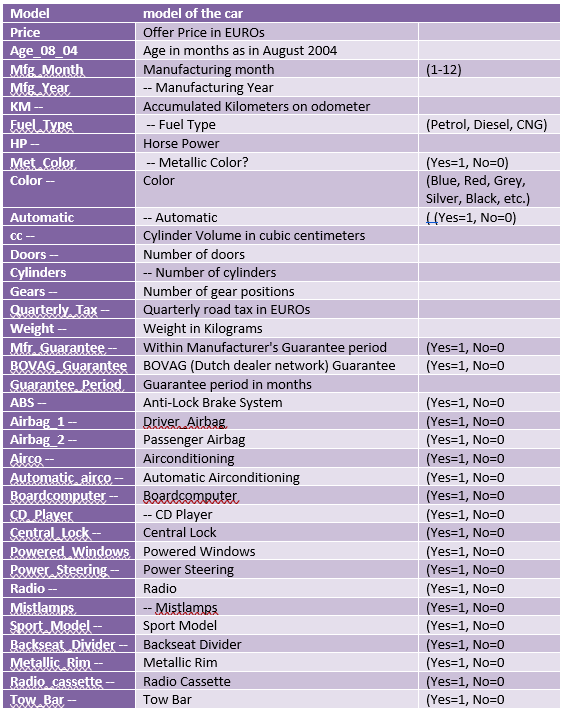

In [2]:
df = pd.read_csv("C:/Users/Shivani Bhavsar/OneDrive/Documents/ExcelR Assignment files/DS/A5 Multiple Linear Regression/ToyotaCorolla.csv" , encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df["Mfg_Year"].unique()

array([2002, 2003, 2004, 2001, 2000, 1999, 1998], dtype=int64)

In [4]:
pip install sweetviz

In [5]:
df1 = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


                                             |          | [  0%]   00:00 -> (? left)


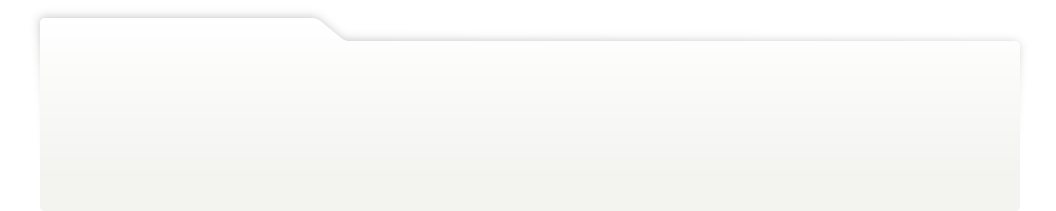
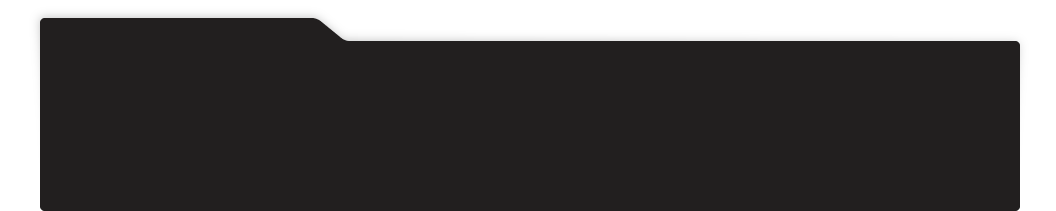
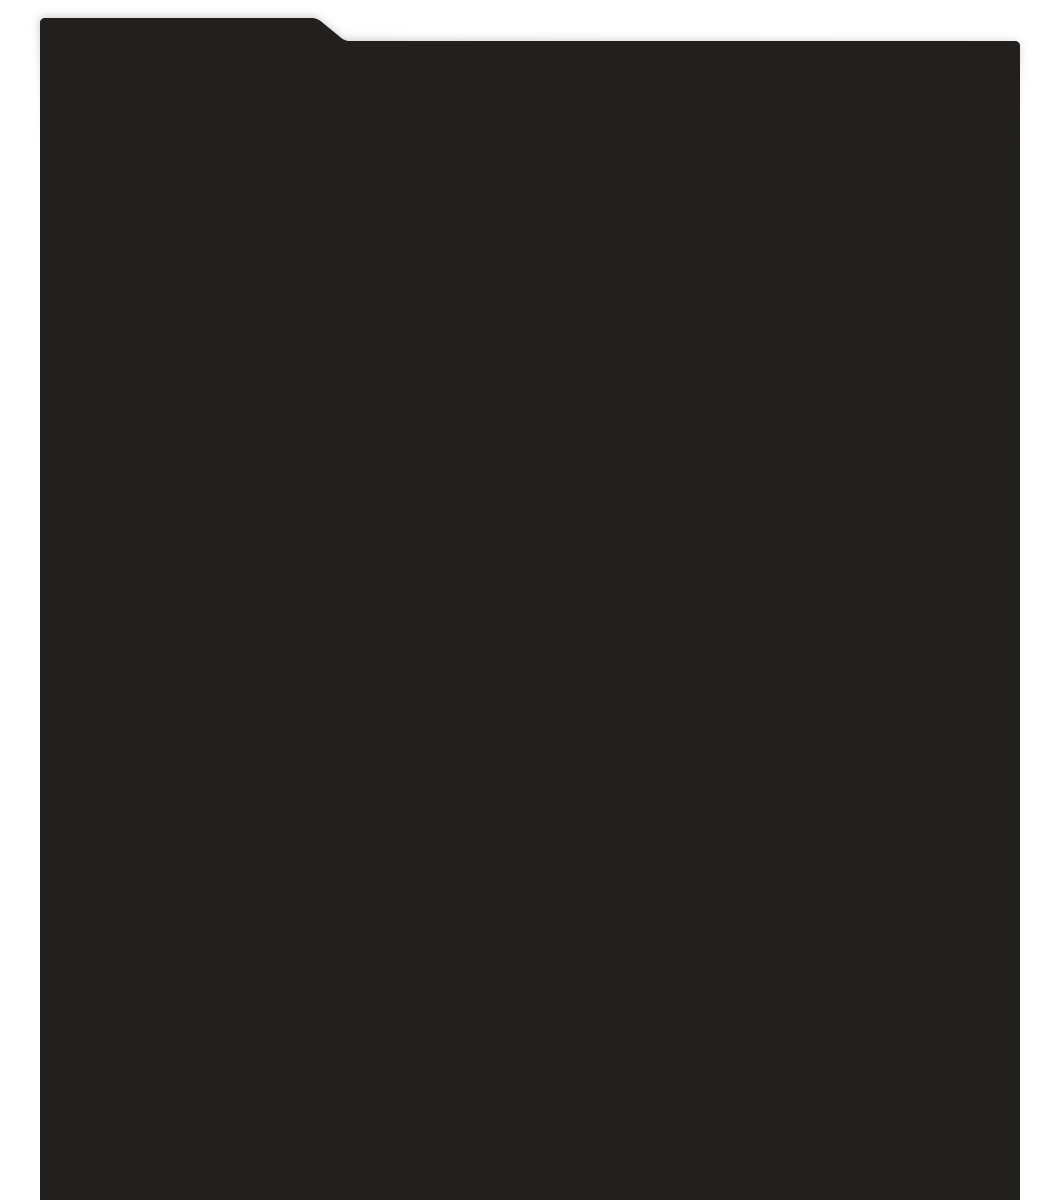
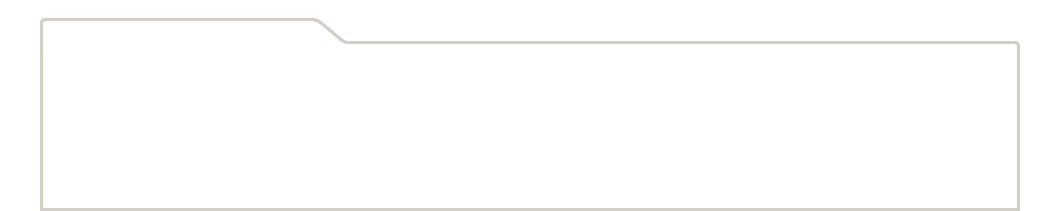
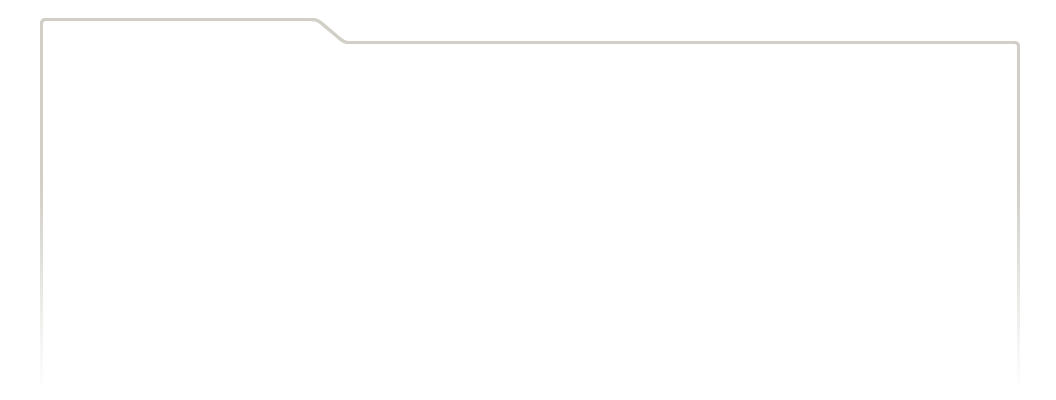
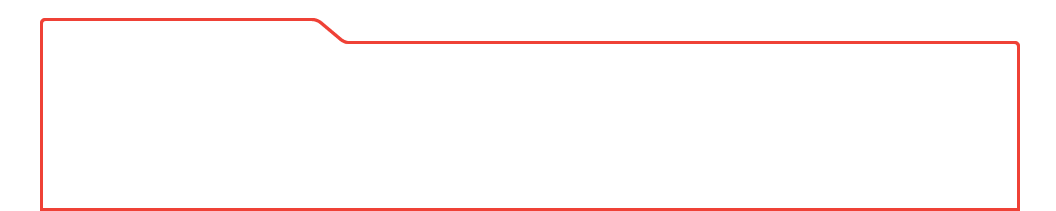
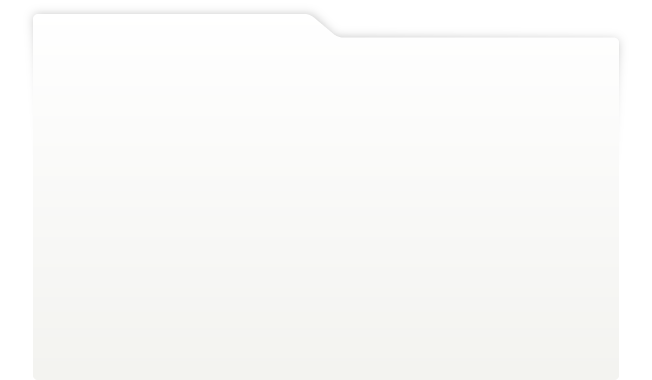
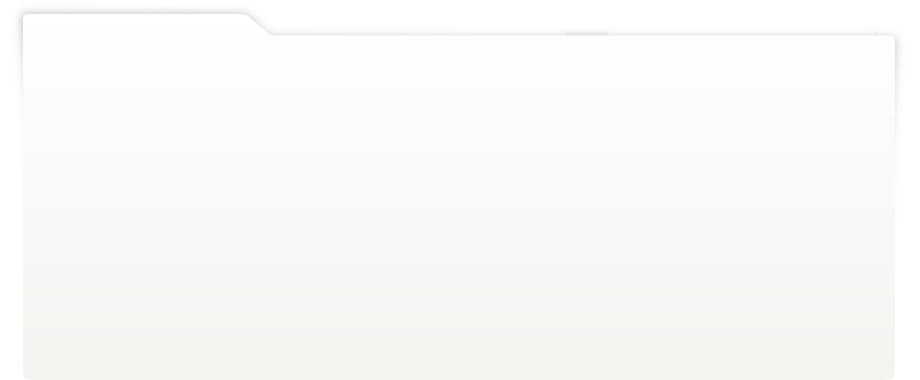
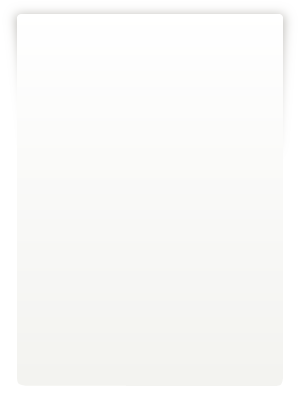
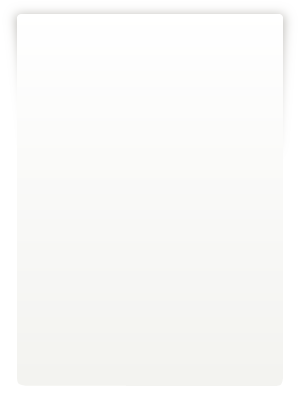
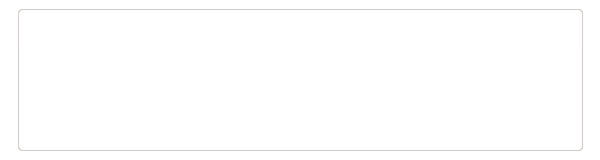
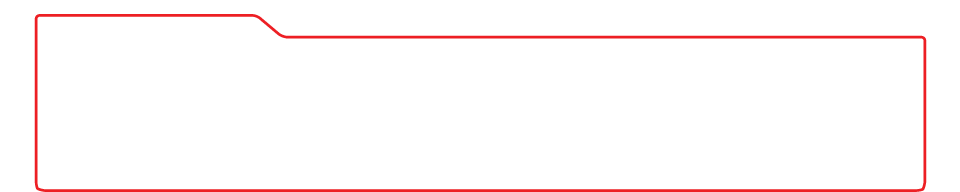
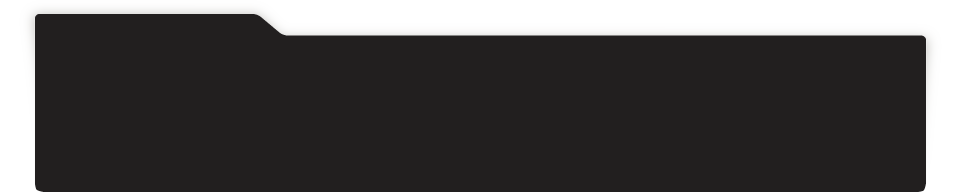
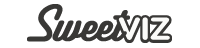
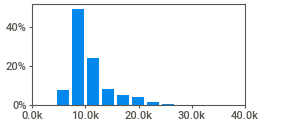
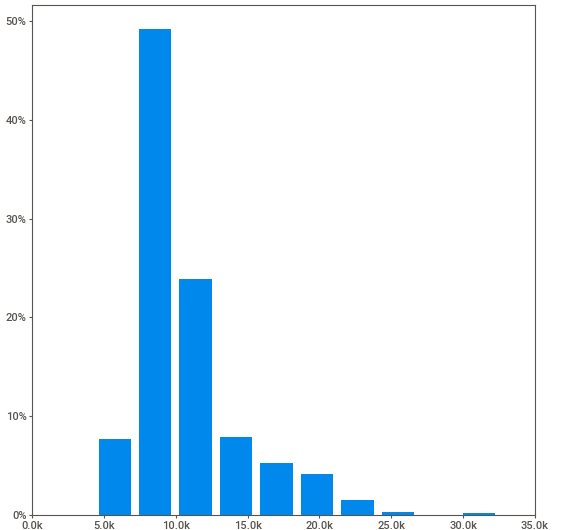
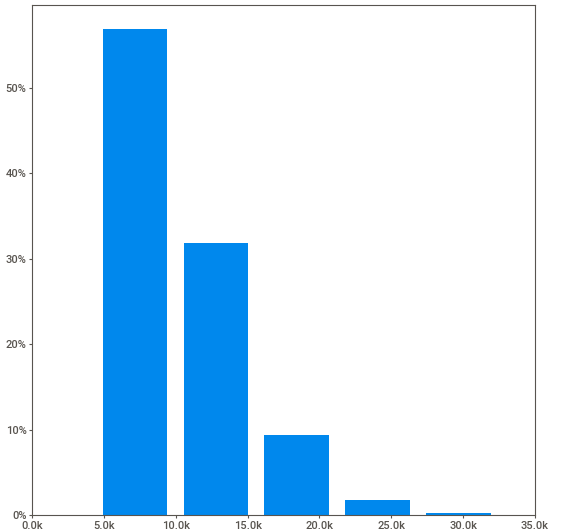
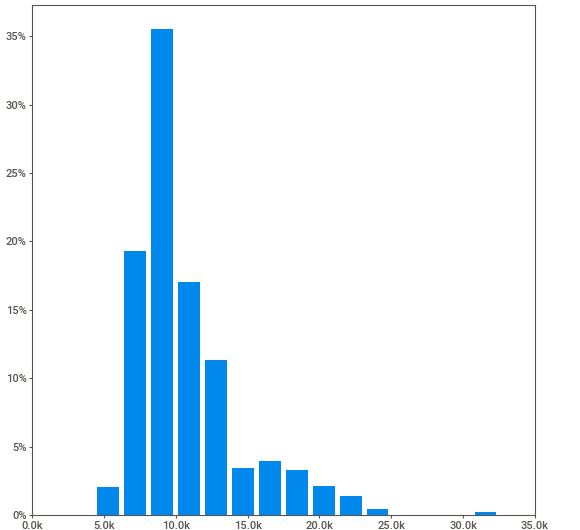
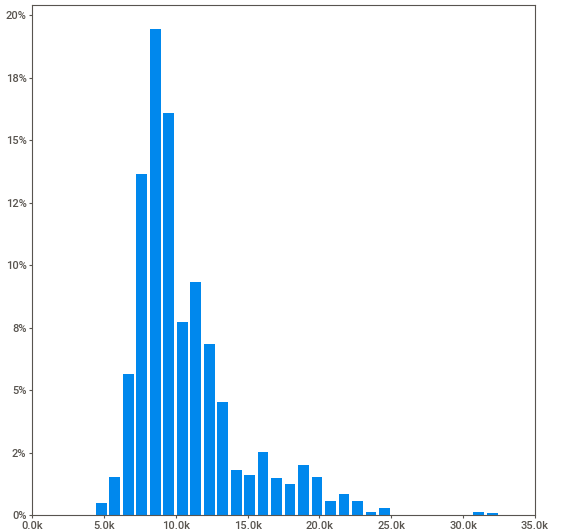
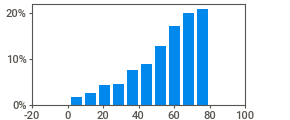
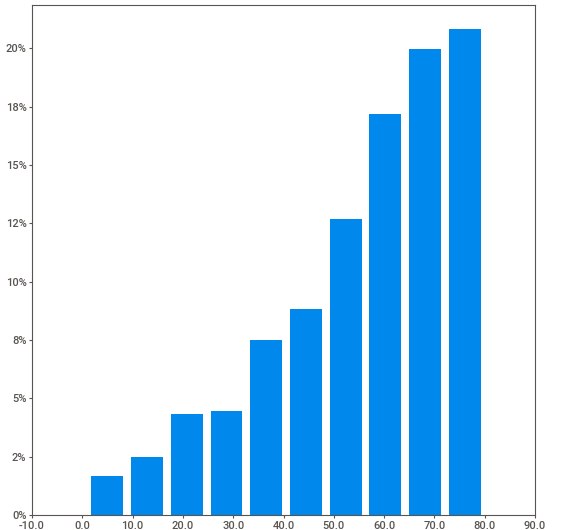
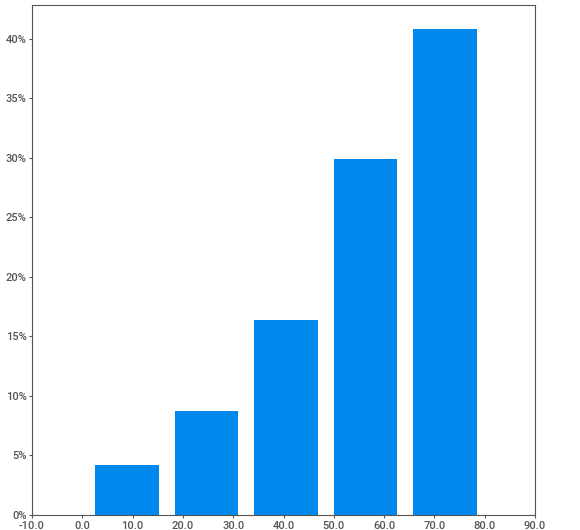
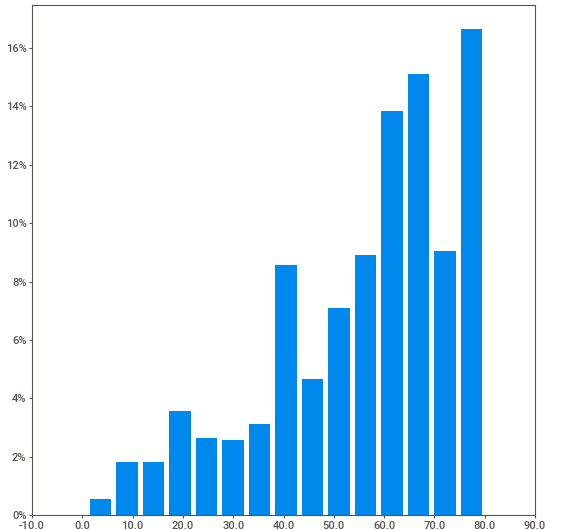
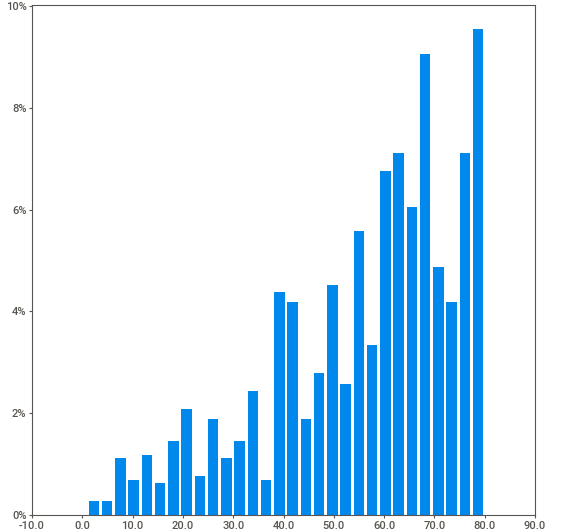
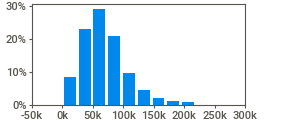
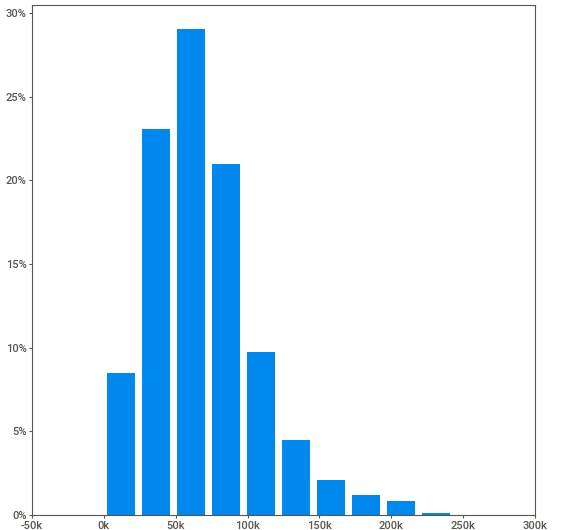
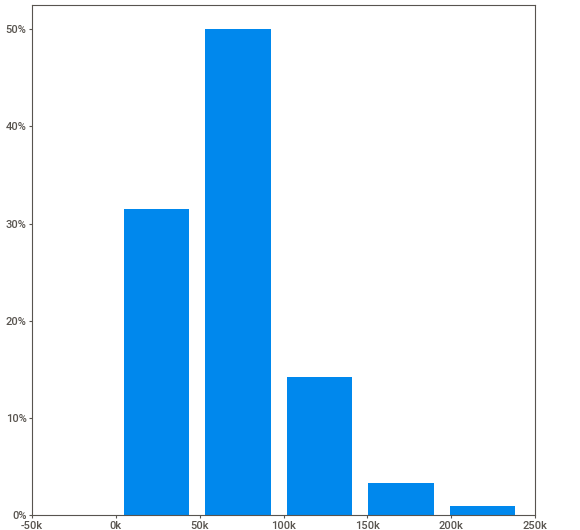
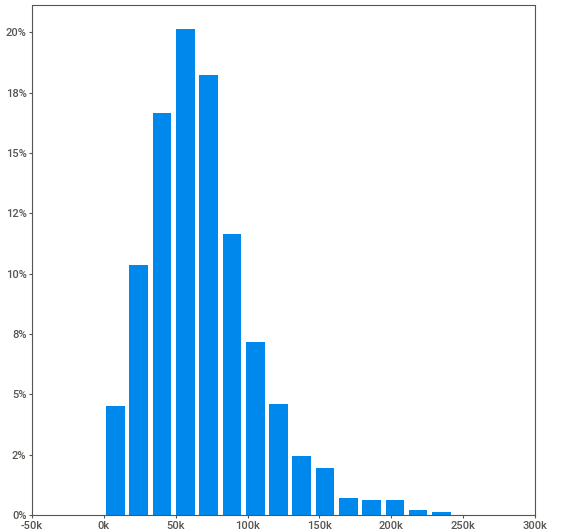
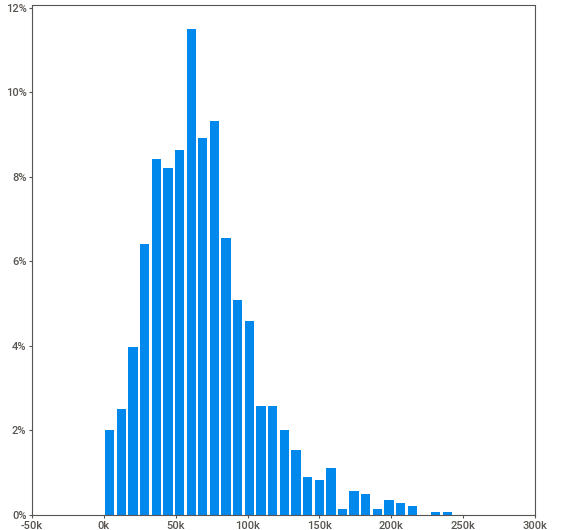
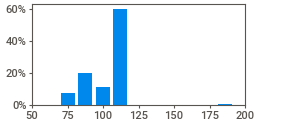
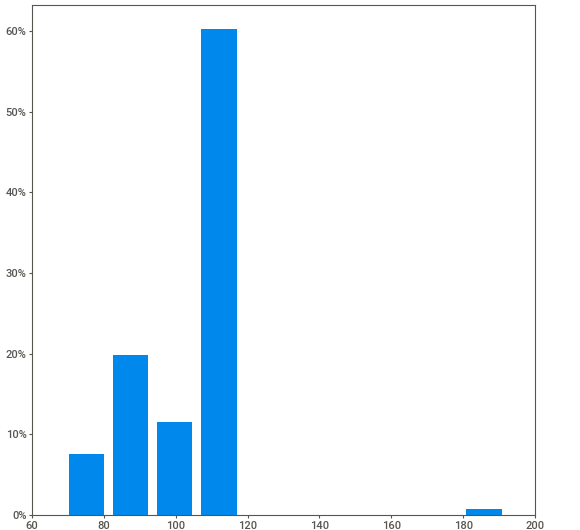
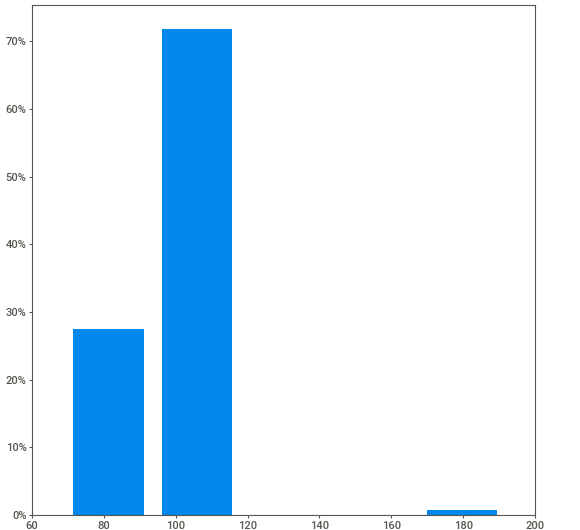
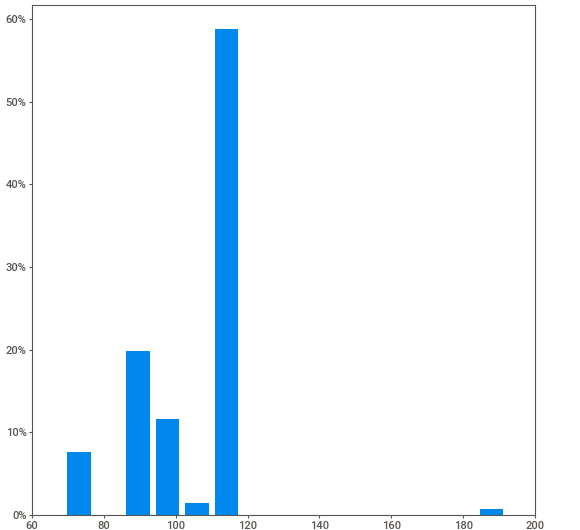
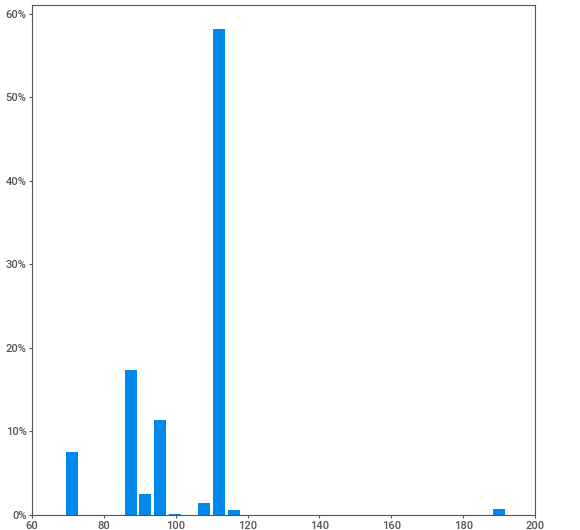
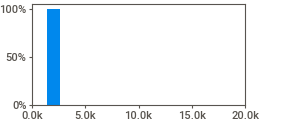
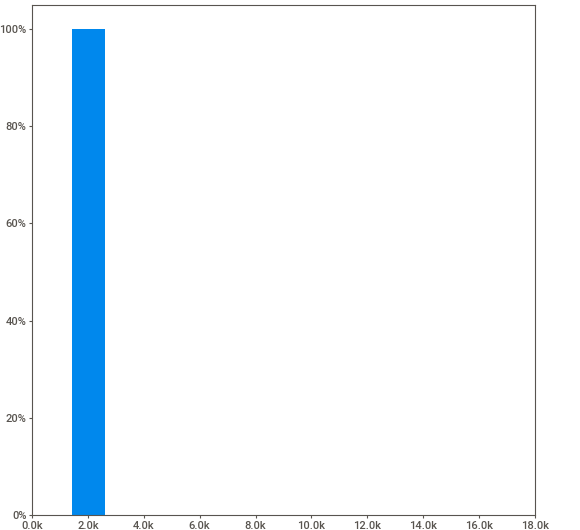
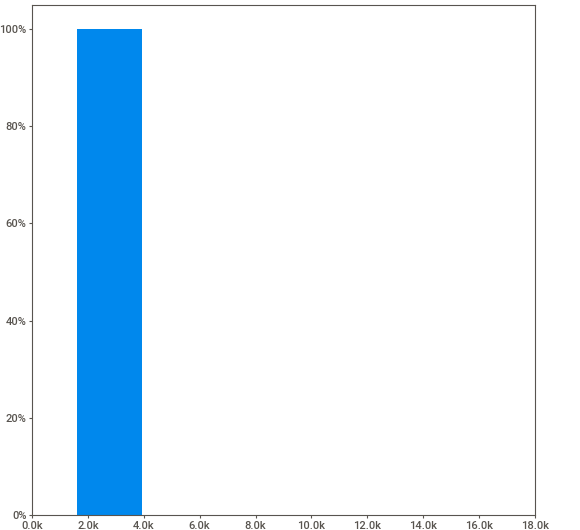
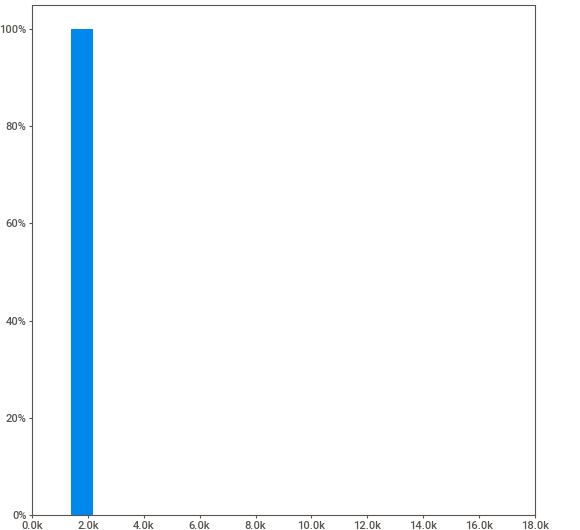
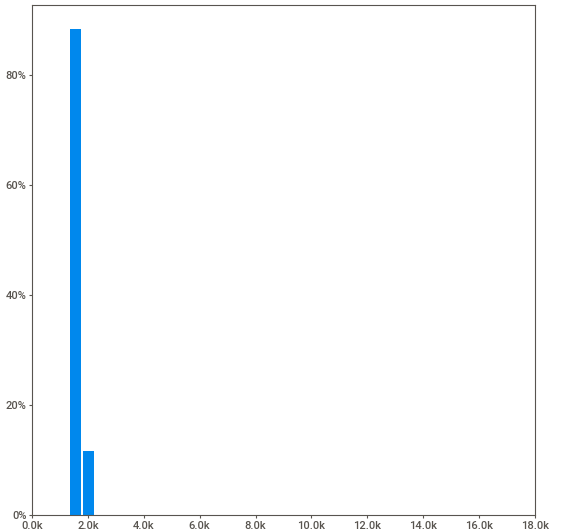
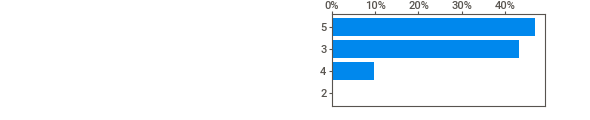
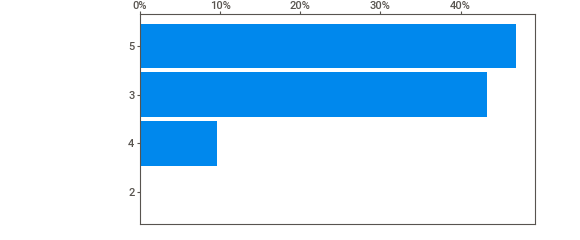
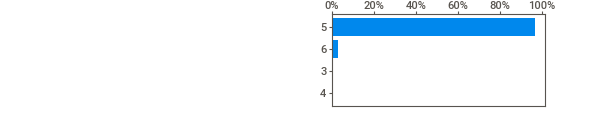
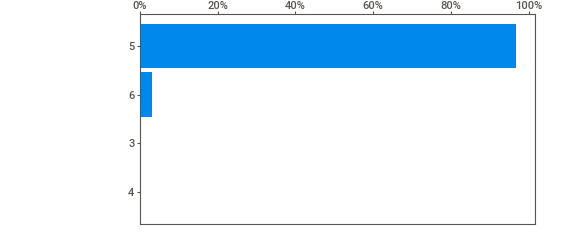
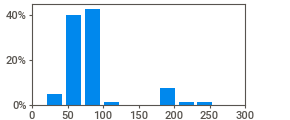
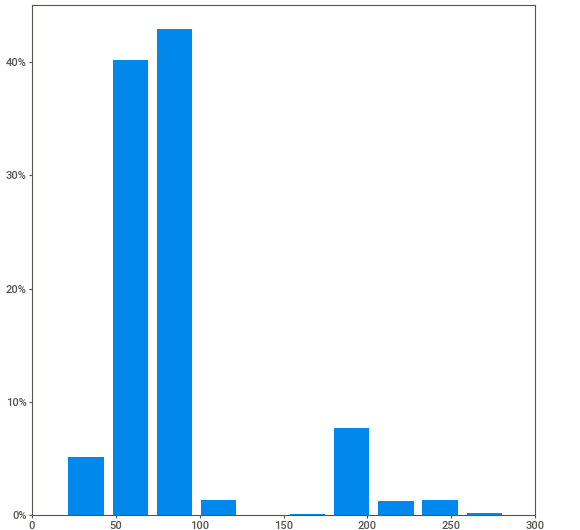
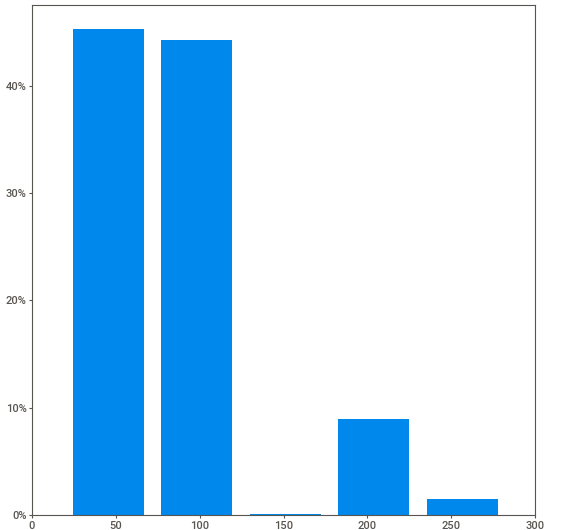
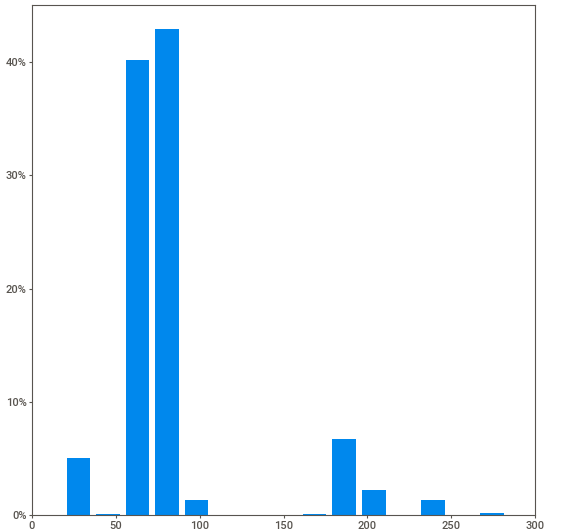
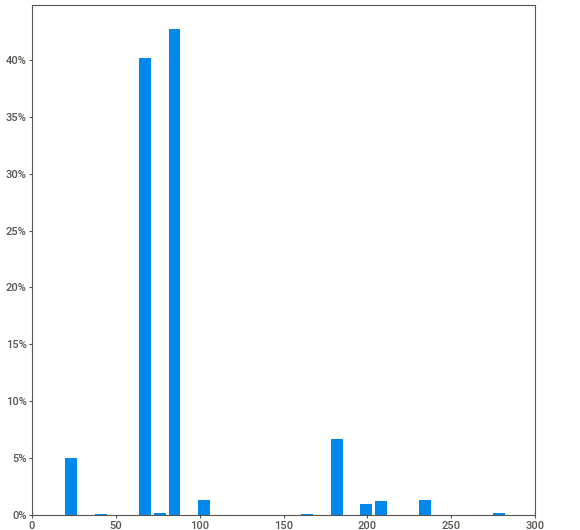
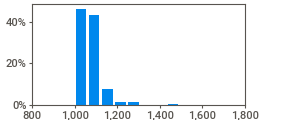
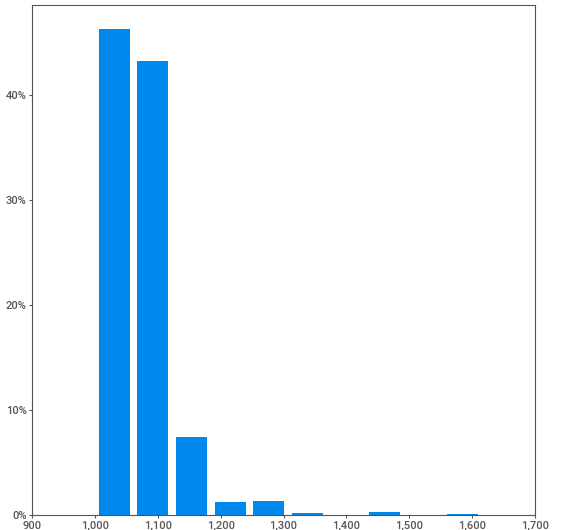
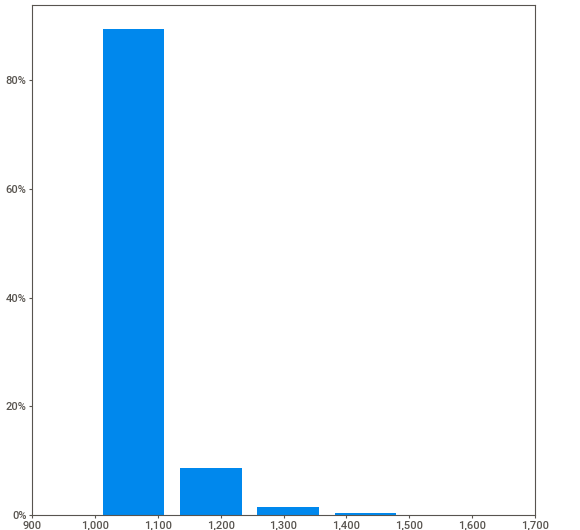
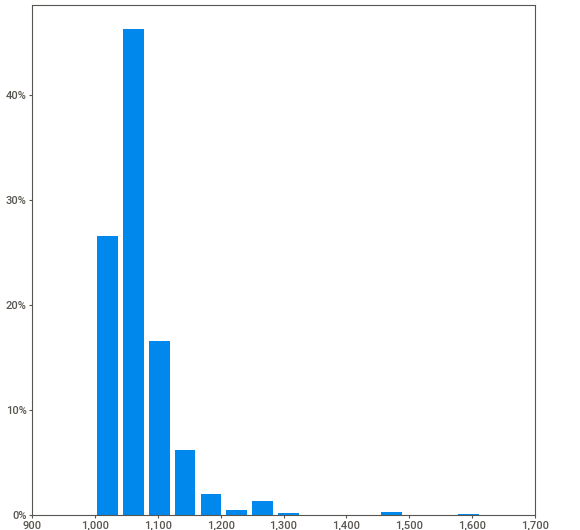
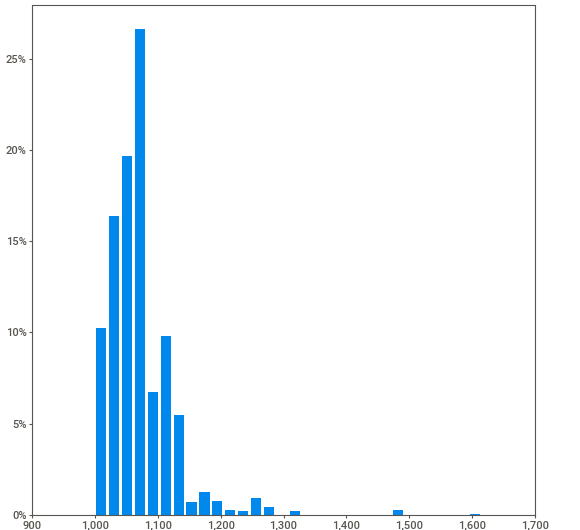
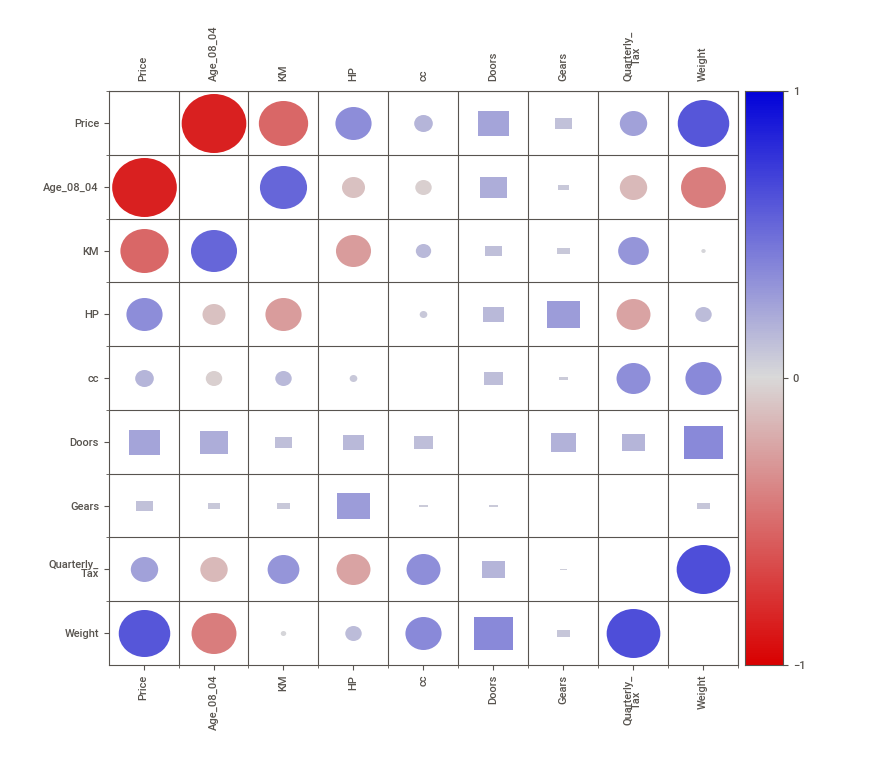
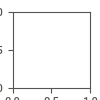

In [6]:
sweet_report = sv.analyze(df1)
sweet_report.show_notebook(w=900, h=500, scale=0.8)

In [7]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### Remove Duplicates :

In [8]:
df1[df1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
df1=df1.drop_duplicates().reset_index(drop=True)
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


## CC["Cylinder Volume in cubic centimeters"]

In [10]:
df1["cc"].value_counts()

1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64

> According to the Google information about Toyota Corolla car the maximum volume of car cylinder in cubic centimeters is 2000 , so here we replace the volume value with mean which are above the 2000 volume.

In [11]:
df1.loc[(df1.cc >2000), 'cc'] = df1["cc"].mean()

In [12]:
df1["cc"].unique()

array([2000.        , 1800.        , 1900.        , 1600.        ,
       1400.        , 1598.        , 1576.56097561, 1995.        ,
       1398.        , 1300.        , 1587.        , 1975.        ,
       1332.        ])

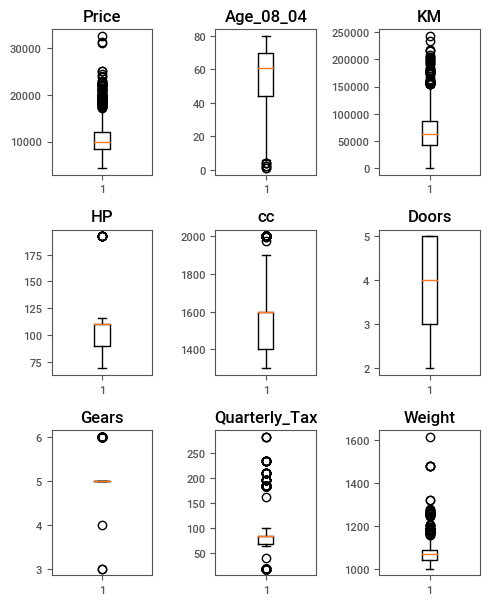

In [13]:
plt.figure(figsize=(5,30))
for i,j in enumerate(df1.columns):
  plt.subplot(15,3,i+1)
  plt.boxplot(df1[j])
  plt.title(j)
  plt.tight_layout()

## Quarterly_Tax :

In [14]:
df1["Quarterly_Tax"].value_counts()

85     613
69     559
185     96
19      72
100     19
210     18
234     18
64      18
197     14
283      3
72       3
163      1
40       1
Name: Quarterly_Tax, dtype: int64

In [15]:
df1.groupby(["Quarterly_Tax", "KM"])["Price"].value_counts()

Quarterly_Tax  KM      Price
19             1       17795    2
                       18245    2
                       6950     1
               2000    18500    1
               9750    12950    1
                               ..
234            100250  16950    1
               110404  16950    1
283            1       32500    1
               1500    31275    1
               4000    31000    1
Name: Price, Length: 1425, dtype: int64

## Gears 

In [16]:
df1["Gears"].value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

In [17]:
df1.groupby('Gears').cc.value_counts()

Gears  cc         
3      1600.000000      2
4      1600.000000      1
5      1600.000000    808
       1300.000000    246
       1400.000000    164
       2000.000000    118
       1900.000000     30
       1800.000000      7
       1587.000000      4
       1598.000000      4
       1332.000000      2
       1398.000000      2
       1995.000000      2
       1576.560976      1
       1975.000000      1
6      1600.000000     34
       1800.000000      7
       1300.000000      2
Name: cc, dtype: int64

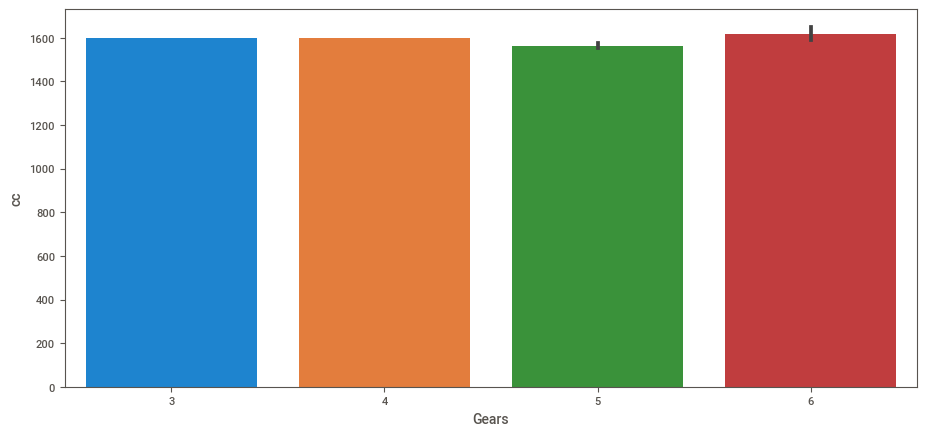

In [18]:
f, ax = plt.subplots(figsize=(11,5))
sns.barplot(x="Gears", y="cc",  data=df1);

## Weight 

In [19]:
df1["Weight"].unique()

array([1165, 1170, 1245, 1185, 1105, 1065, 1120, 1100, 1255, 1270, 1110,
       1195, 1180, 1075, 1130, 1275, 1060, 1115, 1265, 1260, 1125, 1155,
       1045, 1480, 1320, 1280, 1135, 1090, 1150, 1085, 1160, 1205, 1084,
       1140, 1095, 1025, 1119, 1080, 1121, 1615, 1067, 1040, 1030, 1055,
       1050, 1103, 1070, 1035, 1015, 1000, 1078, 1079, 1109, 1020, 1010,
       1114, 1172, 1094, 1083], dtype=int64)

In [20]:
df1["Weight"].value_counts()

1075    192
1050    168
1015    117
1035    106
1070     89
1025     70
1065     51
1080     47
1055     43
1060     40
1085     40
1100     40
1115     39
1110     38
1040     35
1135     33
1105     31
1045     31
1130     29
1030     24
1000     17
1120     17
1140     16
1090     10
1114     10
1020      9
1185      9
1165      8
1150      7
1255      7
1180      5
1260      5
1010      4
1095      4
1480      4
1205      4
1170      4
1270      3
1119      3
1245      3
1195      2
1275      2
1155      2
1320      2
1079      1
1160      1
1109      1
1172      1
1094      1
1084      1
1103      1
1078      1
1280      1
1265      1
1125      1
1067      1
1615      1
1121      1
1083      1
Name: Weight, dtype: int64

> According to the Google information about Toyota Corolla car the maximum weight of car is 1260 kg from the year 1998  to  2002 , so here we replace the weight value with mean which are above the 1260 kg volume

In [21]:
df1.loc[(df1.Weight > 1260) , 'Weight'].value_counts()

1480    4
1270    3
1275    2
1320    2
1265    1
1280    1
1615    1
Name: Weight, dtype: int64

In [22]:
df1.loc[(df1.Weight > 1260) , 'Weight'] = df1["Weight"].mean()

In [23]:
df1["Weight"].describe()

count    1435.000000
mean     1069.452278
std        42.100868
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1260.000000
Name: Weight, dtype: float64

<Figure size 1000x700 with 0 Axes>

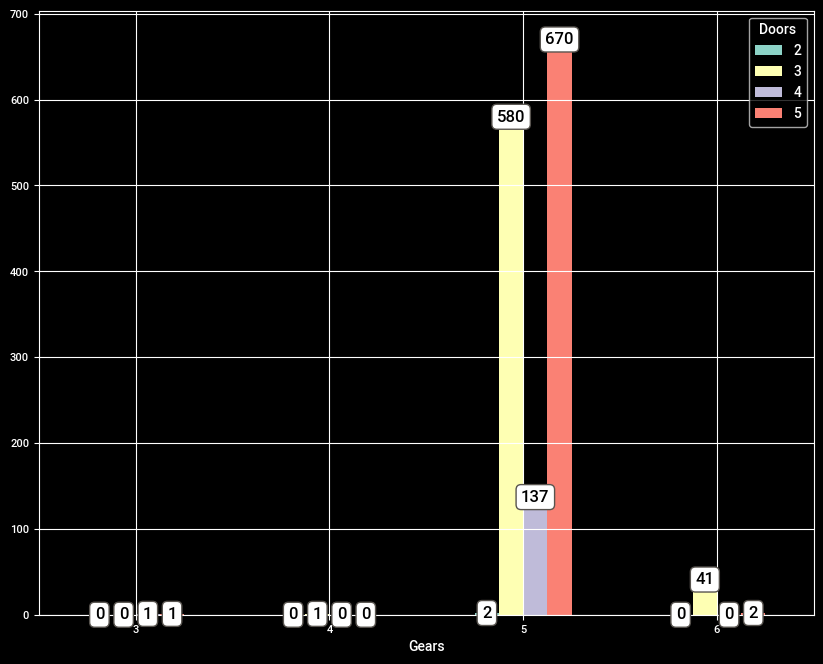

In [24]:
plt.figure(figsize=(10,7), facecolor='black')
with plt.style.context('dark_background'):
   ax = pd.crosstab(df1.Gears,df1.Doors).plot(kind="bar", figsize=(10,8))
plt.xticks(rotation=0)
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2 ,p.get_height(),  
                "%.f" % p.get_height(),
                color='black', rotation="horizontal", fontsize=12, horizontalalignment="center", verticalalignment="center", 
                bbox=dict(boxstyle="Round", fc="w"))
plt.grid()
plt.show()

In [25]:
df1["Age_08_04"].unique()

array([23, 24, 26, 30, 32, 27, 25, 22, 31, 28, 29, 20, 19, 16, 17, 11, 18,
       13, 14,  4,  8,  7, 15, 10, 12,  9,  6,  2,  1, 43, 38, 40, 44, 41,
       37, 39, 42, 35, 34, 33, 36, 53, 51, 54, 45, 55, 48, 52, 49, 56, 50,
       47, 46, 58, 68, 59, 62, 65, 67, 64, 60, 61, 66, 57, 63, 73, 79, 78,
       74, 77, 69, 80, 76, 70, 71, 75, 72], dtype=int64)

In [26]:
df1["Age_08_04"].value_counts()

68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: Age_08_04, Length: 77, dtype: int64

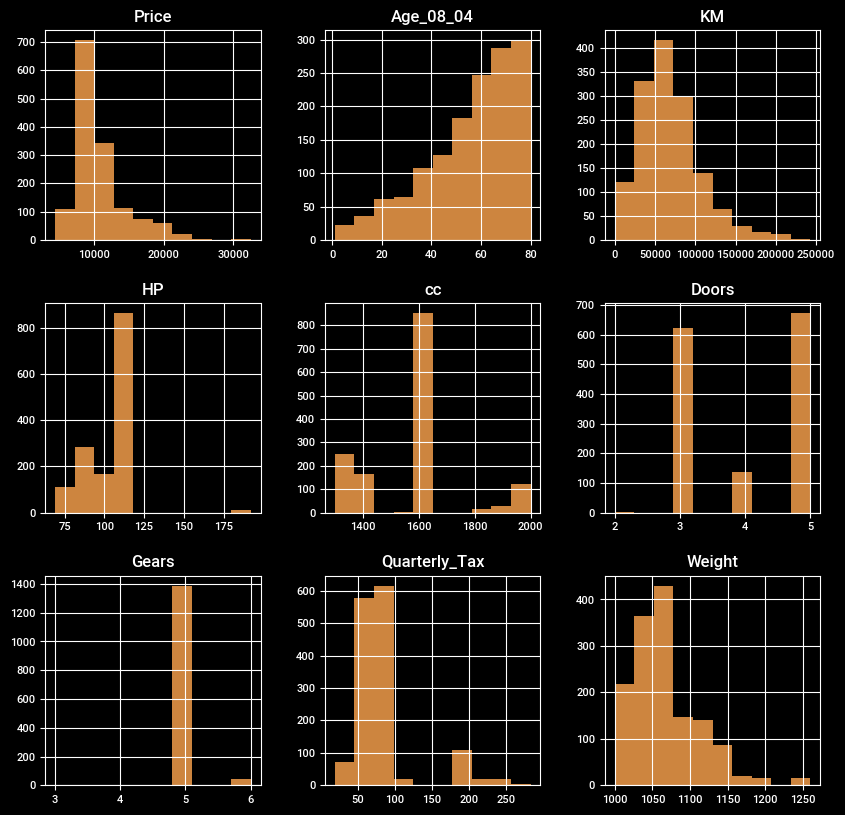

In [27]:
with plt.style.context('dark_background'):
     df1.hist(figsize=(10,10) , color = "peru")
plt.show()

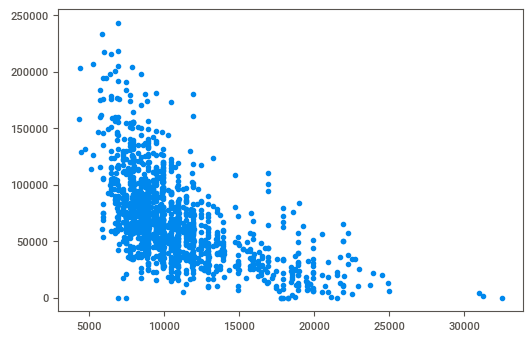

In [28]:
plt.scatter(df1["Price"],df1["KM"])

In [29]:
d = preprocessing.normalize(df1)
df_norm = pd.DataFrame(d ,columns=df1.columns)
df_norm.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.275835,0.000470,0.960029,0.001839,0.040864,0.000061,0.000102,0.004291,0.023804
1,0.185165,0.000310,0.982208,0.001212,0.026933,0.000040,0.000067,0.002828,0.015689
2,0.316733,0.000545,0.947043,0.002043,0.045410,0.000068,0.000114,0.004768,0.026451
3,0.297051,0.000517,0.953742,0.001788,0.039739,0.000060,0.000099,0.004173,0.023148
4,0.335792,0.000733,0.940218,0.002198,0.048842,0.000073,0.000122,0.005128,0.028573


In [30]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1435 non-null   float64
 1   Age_08_04      1435 non-null   float64
 2   KM             1435 non-null   float64
 3   HP             1435 non-null   float64
 4   cc             1435 non-null   float64
 5   Doors          1435 non-null   float64
 6   Gears          1435 non-null   float64
 7   Quarterly_Tax  1435 non-null   float64
 8   Weight         1435 non-null   float64
dtypes: float64(9)
memory usage: 101.0 KB


In [31]:
df_norm.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.221149,0.000929,0.943910,0.001917,0.028793,0.000076,0.000093,0.001545,0.019944
std,0.196888,0.000539,0.140365,0.001217,0.017596,0.000052,0.000056,0.001078,0.012413
min,0.021641,0.000055,0.000031,0.000284,0.006679,0.000012,0.000021,0.000116,0.004566
25%,0.100175,0.000616,0.963377,0.001128,0.017417,0.000042,0.000057,0.000899,0.012088
50%,0.152115,0.000846,0.987962,0.001605,0.024199,0.000061,0.000078,0.001231,0.016493
75%,0.265177,0.001101,0.994737,0.002355,0.035012,0.000091,0.000113,0.001871,0.024080
max,0.997527,0.010527,0.999702,0.015236,0.254303,0.000693,0.000693,0.009517,0.160211


In [32]:
model = smf.ols('Price~Age_08_04+KM+cc+HP+Doors+Gears+Quarterly_Tax+Weight', data=df1).fit() #model fitting
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     989.5
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:29:26   Log-Likelihood:                -12441.
No. Observations:                1435   AIC:                         2.490e+04
Df Residuals:                    1426   BIC:                         2.495e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -871.4940   1673.068     -0.521      0.603   -4153.433    2410.445
Age_08_04      -126.3752      2.827    -44.699      0.000    -131.921    -120.829
KM               -0.0197      0.001    -14.318      0.000      -0.022      -0.017
cc               -2.0444      0.356     -5.748      0.000      -2.742      -1.347
HP               44.5529      3.117     14.295      0.000      38.439      50.666
Doors            36.2742     43.008      0.843      0.399     -48.092     120.641
Gears           487.4475    208.141      2.342      0.019      79.151     895.744
Quarterly_Tax    15.7058      1.462     10.742      0.000      12.838      18.574
Weight           13.7769      1.524      9.037      0.000      10.787      16.767
==============================================================================
Omnibus:                      396.607   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3080.907
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       9.854   Cond. No.                     3.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model.mse_model

1978049813.8025093

### Slope of the line for co-efficients:

>H0:  regression coefficients are insignificant

>H1: regression coefficients are significant


In [34]:
model.params

Intercept       -871.493981
Age_08_04       -126.375177
KM                -0.019675
cc                -2.044374
HP                44.552920
Doors             36.274247
Gears            487.447547
Quarterly_Tax     15.705790
Weight            13.776896
dtype: float64

>Here all the β1 values are > 0.05 so we do not reject H0 and conclude that all the β1 values are significant.

### Testing Colinearity between variables:

>H0: The data are not correlated

>H1: The data are correlated


In [35]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -0.520896
Age_08_04       -44.699356
KM              -14.318127
cc               -5.748150
HP               14.295484
Doors             0.843421
Gears             2.341906
Quarterly_Tax    10.741906
Weight            9.037497
dtype: float64 
 Intercept         6.025203e-01
Age_08_04        1.596897e-273
KM                1.509862e-43
cc                1.101794e-08
HP                2.007067e-43
Doors             3.991343e-01
Gears             1.932254e-02
Quarterly_Tax     6.164140e-26
Weight            5.084903e-19
dtype: float64


>Here, All the p-values are < 0.05 for all the variables, so we reject H0 and conclude that the data are correlated.

In [36]:
Correlation = df_norm.corr()
Correlation.style.background_gradient()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,0.190379,-0.887173,0.893864,0.887046,0.856276,0.884137,0.788481,0.893810
Age_08_04,0.190379,1.000000,-0.085754,0.542150,0.548943,0.478524,0.590599,0.222443,0.566421
KM,-0.887173,-0.085754,1.000000,-0.751048,-0.771255,-0.745708,-0.746012,-0.666267,-0.764874
HP,0.893864,0.542150,-0.751048,1.000000,0.967832,0.899884,0.972038,0.688603,0.970423
cc,0.887046,0.548943,-0.771255,0.967832,1.000000,0.901857,0.977340,0.765044,0.986378
Doors,0.856276,0.478524,-0.745708,0.899884,0.901857,1.000000,0.911499,0.682470,0.918980
Gears,0.884137,0.590599,-0.746012,0.972038,0.977340,0.911499,1.000000,0.714533,0.994768
Quarterly_Tax,0.788481,0.222443,-0.666267,0.688603,0.765044,0.682470,0.714533,1.000000,0.728513
Weight,0.893810,0.566421,-0.764874,0.970423,0.986378,0.918980,0.994768,0.728513,1.000000


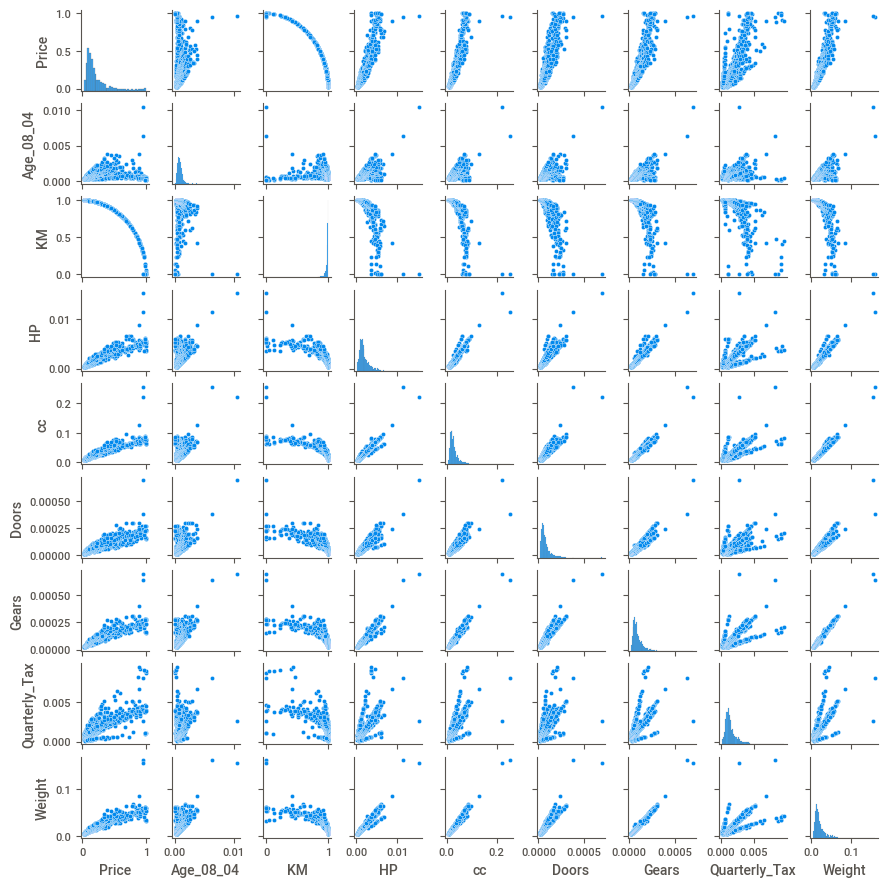

In [37]:
sns.pairplot(data = df_norm, height = 1)  

# Detecting Multicollinearity with VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_norm[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
7,726.423416,Weight
5,516.389989,Gears
3,223.233515,cc
2,86.092021,HP
4,21.335131,Doors
6,10.008068,Quarterly_Tax
0,8.676503,Age_08_04
1,4.186150,KM


>VIF={1/{1-R^2}  :   As we see from the formula, greater the value of R-squared, greater is the VIF.

>Generally, If VIF above 20 indicates a high multicollinearity.

>here "CC", "Age_08_04", "Quarterly_Tax", "KM"  values are less than 20 , so there is no multicollinearity or we reject H0 and conclude that the regression co-efficients are significant .

>Where Weight , Gears , cc, HP , Doors dats ponits are involved in colinearity 

## Subset Selection : 

----

> Subset selection with Weight , Gears , cc ,  HP , Doors.

### AIC

### M1 : Build model without weight 

In [39]:
import statsmodels.formula.api as smf 
M1 = smf.ols('Price~Age_08_04+KM+cc+HP+Doors+Gears+Quarterly_Tax',data=df_norm).fit()
f'AIC:{M1.aic} ,R^2:{M1.rsquared} , Adj.R^2 : {M1.rsquared_adj} , MSE : {M1.mse_model}'

'AIC:-5908.958160673546 ,R^2:0.975664824429631 , Adj.R^2 : 0.9755454507582977 , MSE : 7.748028781824028'

### M2 : Build model without Gears

In [40]:
M2 = smf.ols('Price~Age_08_04+KM+cc+HP+Doors+Quarterly_Tax+Weight',data=df_norm).fit()
f'AIC:{M2.aic} ,R^2:{M2.rsquared} , Adj.R^2 : {M2.rsquared_adj} , MSE : {M2.mse_model}'

'AIC:-5920.378373082511 ,R^2:0.9758577233423583 , Adj.R^2 : 0.9757392959165675 , MSE : 7.7495606463438635'

### M3 : Build model without cc

In [41]:
M3 = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df_norm).fit()
f'AIC:{M3.aic} ,R^2:{M3.rsquared} , Adj.R^2 : {M3.rsquared_adj} , MSE : {M3.mse_model}'

'AIC:-5743.041727151378 ,R^2:0.9726820480677664 , Adj.R^2 : 0.972548042697391 , MSE : 7.724341715812417'

### M4 : Build model without HP

In [42]:
M4 = smf.ols('Price~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_norm).fit()
f'AIC:{M4.aic} ,R^2:{M4.rsquared} , Adj.R^2 : {M4.rsquared_adj} , MSE : {M4.mse_model}'

'AIC:-5466.890375912513 ,R^2:0.9668850768234513 , Adj.R^2 : 0.9667226350138957 , MSE : 7.67830633673168'

### M5 : Build model without Doors

In [43]:
M5 = smf.ols('Price~Age_08_04+KM+cc+HP+Gears+Quarterly_Tax+Weight',data=df_norm).fit()
f'AIC:{M5.aic} ,R^2:{M5.rsquared} , Adj.R^2 : {M5.rsquared_adj} , MSE : {M5.mse_model}'

'AIC:-5959.558595392467 ,R^2:0.9765079696167484 , Adj.R^2 : 0.976392731906389 , MSE : 7.754724434894088'

> SO now we select Model : M4 without HP which have a low aic compare to other 3 model and hight R^2 and Adj.R^2 values.

### Assumption about the errors for multiple linear regression  :

>1. The Means of the Error should be 0.

>2. No pattern inside the Regression plot , it should be completely random.

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


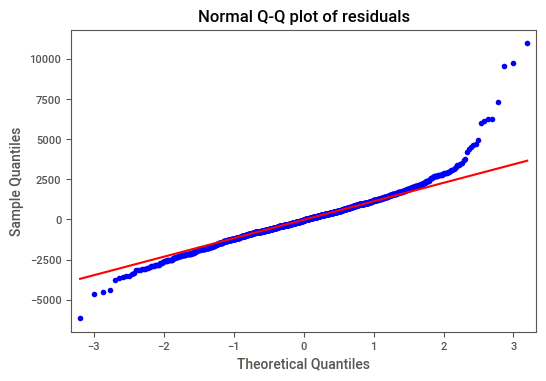

In [44]:
import statsmodels.api as sm

qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [45]:
list(np.where(model.resid))

[array([   0,    1,    2, ..., 1432, 1433, 1434], dtype=int64)]

In [46]:
M4.resid.mean()

5.059456531624795e-14

# Residual Plot for Homoscedasticity

In [47]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

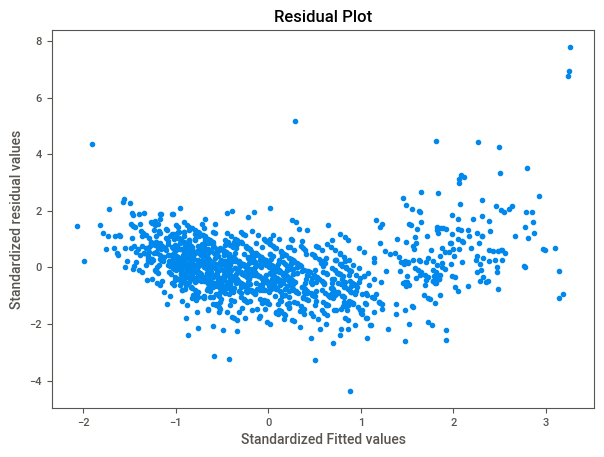

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

In [49]:
x1 = df_norm[['Age_08_04','KM','cc','Doors','Gears','Quarterly_Tax','Weight']]

C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_38852/682252223.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_38852/682252223.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_38852/682252223.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_38852/682252223.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_38852/682252223.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_38852/682252223.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_38852/682252223.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1500x1000 with 0 Axes>

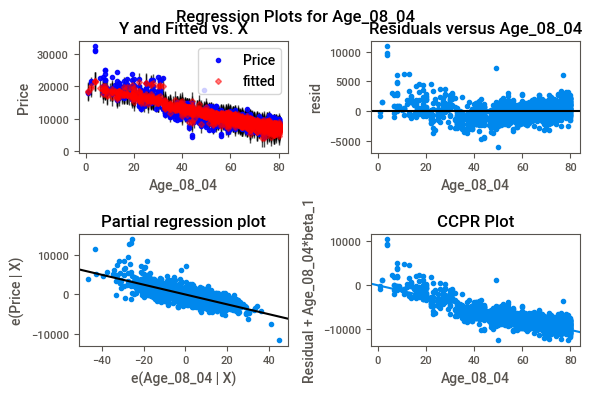

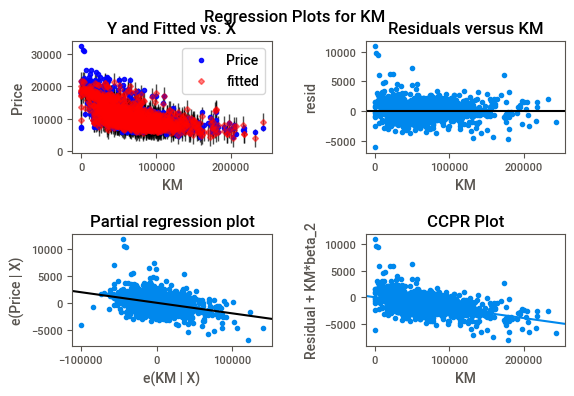

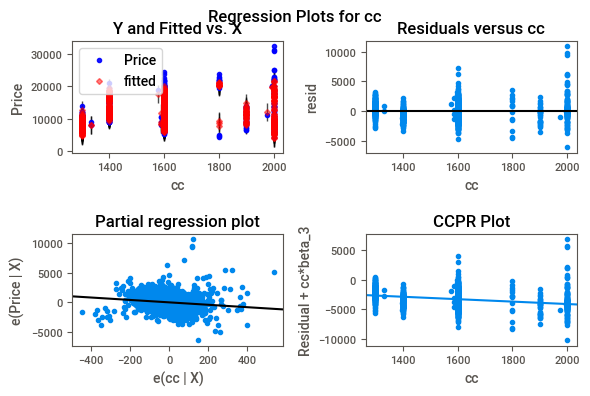

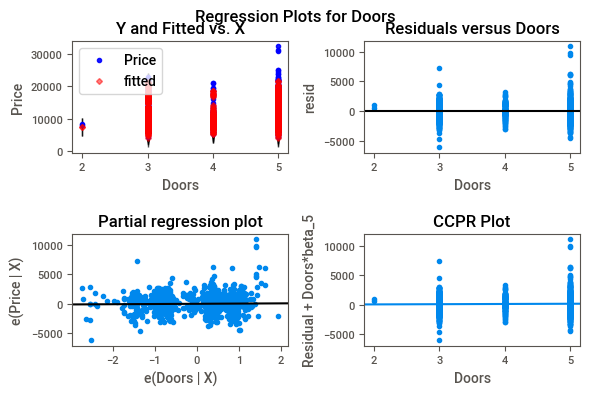

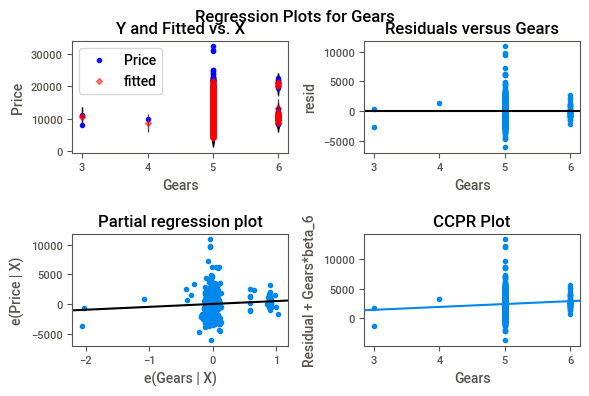

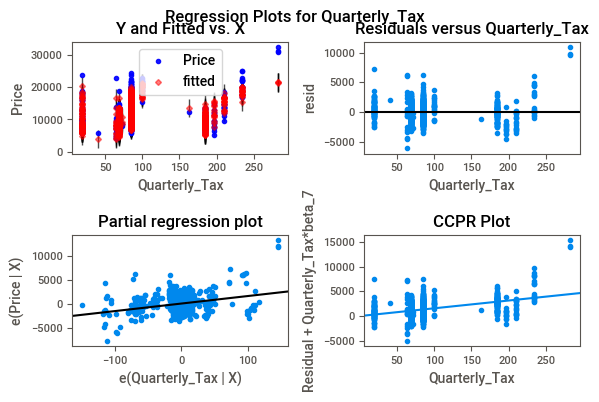

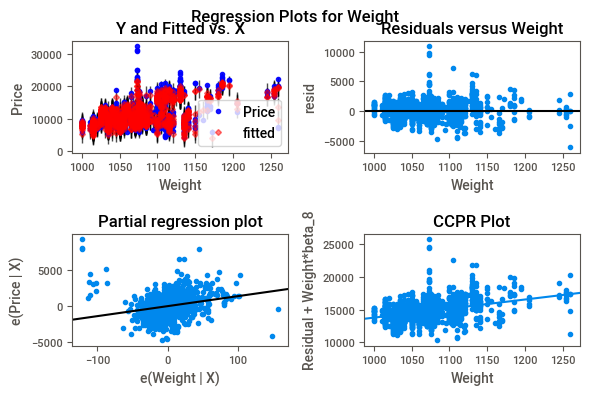

In [50]:
plt.figure(figsize=(15,10))
for i in x1.columns:
    fig = sm.graphics.plot_regress_exog(model, i )
    fig.show()
    print()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook's Distance


In [51]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
print(c)

[8.27898284e-03 4.75148180e-03 6.43757922e-03 ... 4.38854305e-06
 8.09306044e-04 5.81237514e-03]


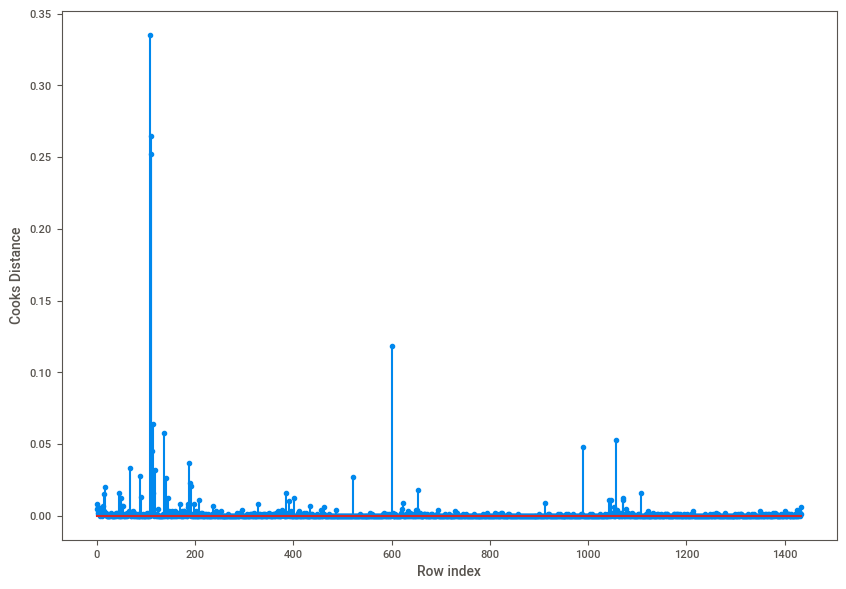

In [62]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(df_norm)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

>Since the value is <1 , we can stop the diagnostic process and finalize the model

In [53]:
#row no. , position of value
(np.argmax(c),np.max(c))

(109, 0.3348577018357521)

In [54]:
(np.argmin(c),np.min(c))

(806, 1.1120595368337097e-10)

In [64]:
df_norm.shape[0] , df_norm.shape[1]

(1435, 9)

In [56]:
k = df_norm.shape[1] # columns
n = df_norm.shape[0] # rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

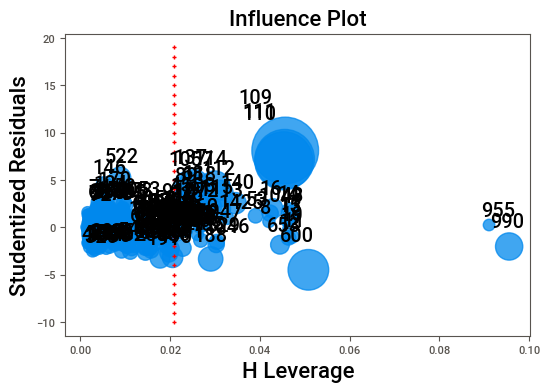

In [57]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-10,20)]
x=[leverage_cutoff for i in range(30)]
plt.plot(x,y,'r+')

plt.show() 

<b>
<div align="center" style="color:white;
           background-color:green;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:1px"> 
    <p style="padding: 10px;color:white;">
     </p>
    
   <center> ~~*~~  Thank You  ~~*~~   </center>  
       </div>
</b>